SAMPLE IMAGES  Chowmahalla Palace, Buterfly & simple  
https://answers.opencv.org/question/72388/where-to-get-simplejpg/  
CT_brain  https://radiopaedia.org/cases/normal-ct-brain-pre-and-post-contrast  
Baloon_Noise  https://people.math.sc.edu/Burkardt/c_src/image_denoise/image_denoise.html  
Scratch_wound_healing  https://www.tandfonline.com/doi/pdf/10.4161/cam.36224  
first woman on the Internet  https://steemit.com/internet/@hrsagar/the-first-woman-on-the-internet-jpeg-format-and-playboy-magazine  
the original cameraman MIT  https://www.researchgate.net/figure/Example-of-DCT-applied-on-Cameraman-image-a-original-b-DCT_fig1_344839334  
Chuck Close - Self portrait  https://www.artsy.net/artwork/chuck-close-self-portrait-45  
High_ISO  https://www.photoreview.com.au/tips/shooting/how-to-control-image-noise/
http://www.boostyourphotography.com/2014/05/ISO.html  
https://amazingsky.net/tag/high-iso/


# **22 DENOISE**

(480, 640, 3) uint8


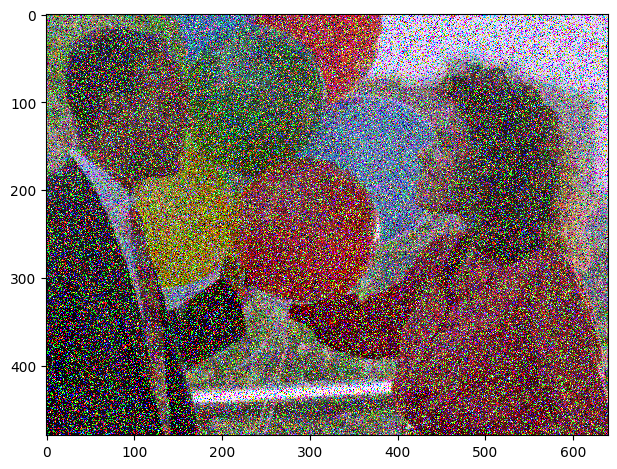

In [ ]:
path = "/content/balloons_noisy.png"

from skimage    import io, img_as_ubyte  #
from matplotlib import pyplot as plt    # https://matplotlib.org/stable/plot_types/index.html


img = io.imread(path);     print(img.shape, img.dtype)  # (157, 321, 3) uint8 Tensor similar to Torch dim=3
plt.subplot(1,1,1); io.imshow(img)

In [ ]:
# GAUSSIAN KERNEL
import numpy as np
def Gaussian_kernel (size, size_y = None ): 
  size = int(size)             ###
  if not size_y :                 #
    size_y = size                 ### NON rectangular
  else:                           #
    size_y = int( size_y )     ###
  x,y = np.mgrid[-size:size+1 , -size_y:size_y+1] 
  g = np.exp( -(x**2/float(size)+ y**2/float(size_y))  )
  return g/g.sum()

def Lineal_kernel (size):
  y,x = np.mgrid[-size:size+1 , -size:size+1]
  g = np.exp( x+y )
  return g

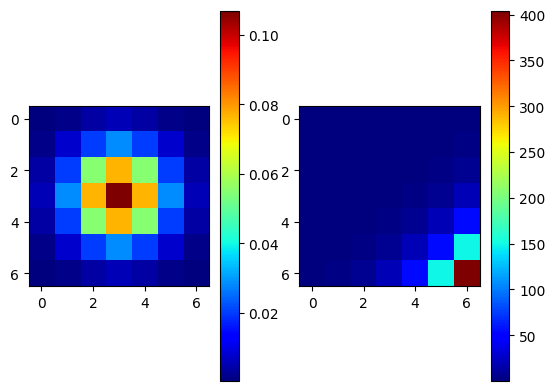

In [ ]:
gauss_ker = Gaussian_kernel(3); plt.subplot(1,2,1) # print(gauss_ker)
plt.imshow(gauss_ker, cmap=plt.get_cmap("jet"), interpolation='nearest'); plt.colorbar();


rad_ker = Lineal_kernel (3); plt.subplot(1,2,2) # print(Radial_ker)
plt.imshow(rad_ker, cmap=plt.get_cmap("jet"), interpolation='nearest')
plt.colorbar(); plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
wavelength = 0.5
x = y = np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(x, y)
output = np.exp(-5 * (X ** 2) / 2 - 5 * (Y ** 2) / 2)

ax = fig.add_subplot(122, projection="3d")
ax.plot_surface(X, Y, output, cmap="copper")
plt.show()

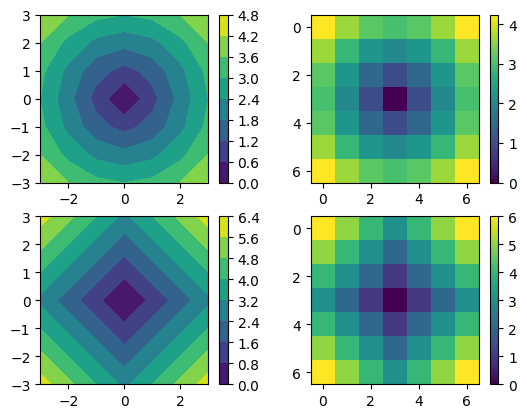

In [ ]:
from skimage.segmentation.morphsnakes import disk_level_set
# https://www.geeksforgeeks.org/numpy-meshgrid-function/
# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
# https://thepythoncodingbook.com/2022/05/28/numpy-meshgrid/


def Dist_kernel (size):
  x = np.linspace(-size, size, 1+2*size) # bagin end (steps: dx>2)
  y = np.linspace(-size, size, 1+2*size)
  xs, ys = np.meshgrid(x, y)   # sparse coordinate arrays
  zz = np.sqrt(xs**2 + ys**2)
  return x,y, zz

def Posit_kernel (size):
  x = np.linspace(-size, size, 1+2*size) # bagin, end, (steps: dx=1)
  y = np.linspace(-size, size, 1+2*size)
  xs, ys = np.meshgrid(x, y)   # sparse coordinate arrays
  zs = (np.abs(xs) + np.abs(ys) )
  return x,y, zs

xd,yd,Distance  = Dist_kernel(3)
xp,yp,Position  = Posit_kernel(3)

plt.subplot(2,2,1); plt.contourf(xd, yd, Distance);  plt.axis('scaled'); plt.colorbar()
plt.subplot(2,2,2); plt.imshow( Distance) ; plt.axis('scaled'); plt.colorbar(); 

plt.subplot(2,2,3); plt.contourf(xp, yp, Position);  plt.axis('scaled'); plt.colorbar()
plt.subplot(2,2,4); plt.imshow( Position) ; plt.axis('scaled'); plt.colorbar(); plt.show()

In [ ]:
Position

array([[6., 5., 4., 3., 4., 5., 6.],
       [5., 4., 3., 2., 3., 4., 5.],
       [4., 3., 2., 1., 2., 3., 4.],
       [3., 2., 1., 0., 1., 2., 3.],
       [4., 3., 2., 1., 2., 3., 4.],
       [5., 4., 3., 2., 3., 4., 5.],
       [6., 5., 4., 3., 4., 5., 6.]])

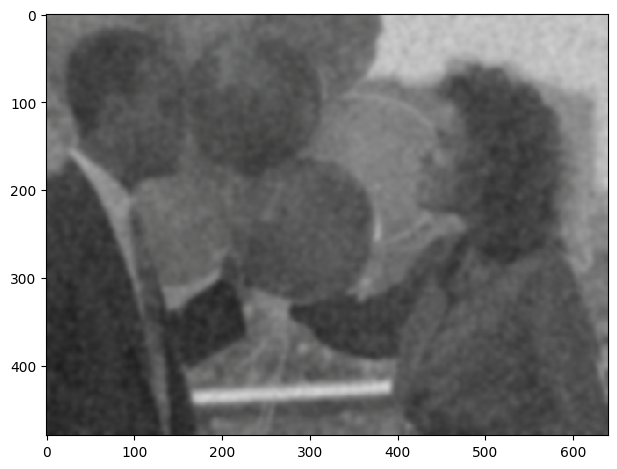

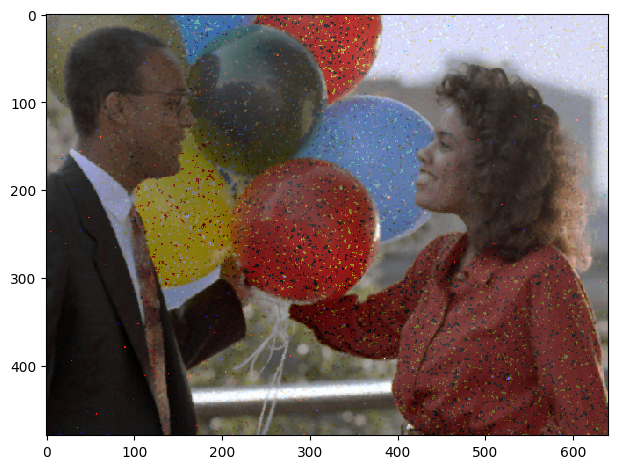

In [ ]:
# MEDIAN FILTER
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html
from skimage import io
from scipy import ndimage as nd
from matplotlib import pyplot as plt 

img = io.imread(path)
gaussian_img  = nd.gaussian_filter(img, sigma=3)
median_img    = nd.median_filter  (img, size=3)
plt.subplot(1,1,1); io.imshow(gaussian_img);plt.show()
plt.subplot(1,1,1); io.imshow(median_img);plt.show()

estimated noise standard deviation = 0.2555345870948122


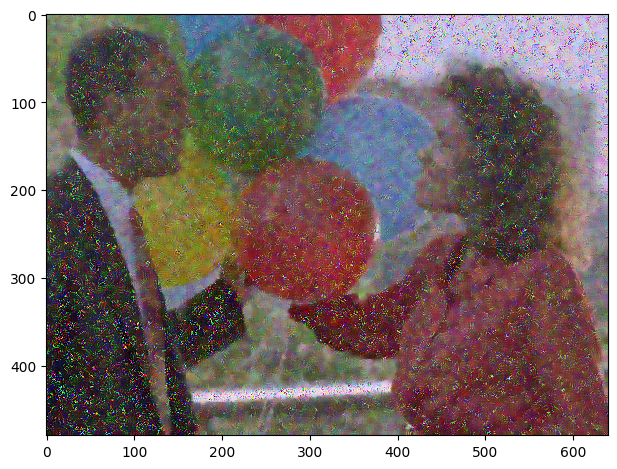

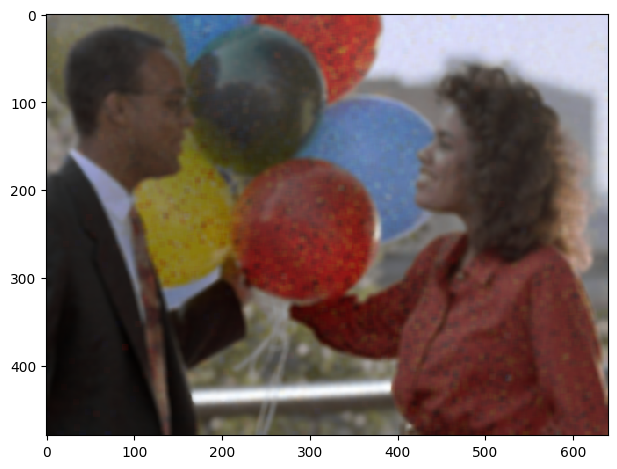

In [ ]:
# NON LOCAL MEANS
# https://scikit-image.org/docs/stable/auto_examples/filters/plot_nonlocal_means.html
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.util import random_noise


sigma = 0.08
noisy = random_noise(img, var=sigma**2)
sigma_est = np.mean(estimate_sigma(noisy, channel_axis=-1))
print(f'estimated noise standard deviation = {sigma_est}')
patch_kw = dict(patch_size=5,      # 5x5 patches
                patch_distance=3,  # 13x13 search area
                channel_axis=-1)

denoise1 = denoise_nl_means(img, h=0.5 * sigma_est, sigma=sigma_est,
                            fast_mode=True, **patch_kw)

plt.subplot(1,1,1); io.imshow(denoise1);plt.show()

denoise2 = denoise_nl_means(median_img , h=0.5 * sigma_est, sigma=sigma_est,
                            fast_mode=True, **patch_kw)

plt.subplot(1,1,1); io.imshow(denoise2);plt.show()


# **23 HISTOGRAM BASED SEGMENTATION**

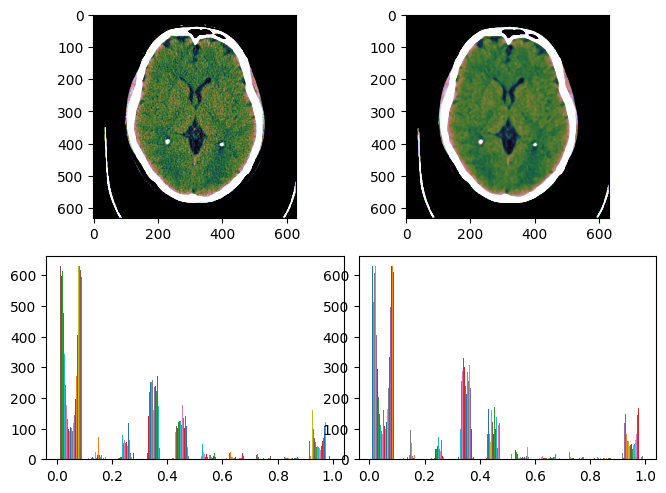

In [ ]:
from skimage.util.noise import img_as_float
path = "/content/CT_brain.jpg"

from skimage   import io, img_as_float, img_as_ubyte
from scipy     import ndimage as nd
import numpy    as np
from matplotlib import pyplot as plt 

img = io.imread(path, as_gray=True)
denoise_img = nd.median_filter  (img, size=8)
ubyte_img   = img_as_ubyte(denoise_img)

plt.subplot(2,2,1); io.imshow(img,cmap="cubehelix")
plt.subplot(2,2,2); io.imshow(denoise_img,cmap="cubehelix");
plt.subplot(2,2,3); plt.hist(img) # .flat bins=10, range=(0,255)
plt.subplot(2,2,4); plt.hist(denoise_img)
plt.show()



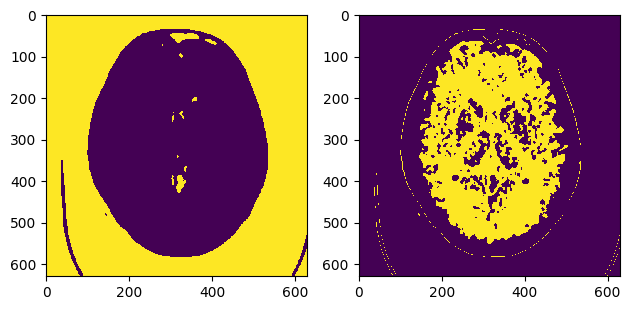

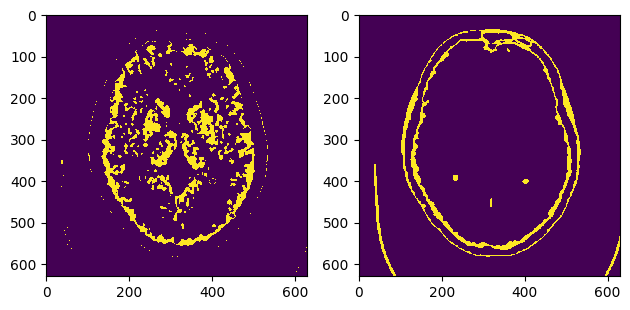

In [ ]:
segment_1 = (0.1 >= denoise_img) 
segment_2 = (0.4 >= denoise_img ) & (denoise_img > 0.1) 
segment_3 = (0.5 >= denoise_img ) & (denoise_img> 0.4) 
segment_4 = (1.0 > denoise_img ) & (denoise_img> 0.5) 
plt.subplot(1,2,1); io.imshow(segment_1 ,cmap="viridis")
plt.subplot(1,2,2); io.imshow(segment_2 ,cmap="viridis");  plt.show()
plt.subplot(1,2,1); io.imshow(segment_3 ,cmap="viridis")
plt.subplot(1,2,2); io.imshow(segment_4 ,cmap="viridis");  plt.show()


# **24 RANDOM WALKER SEGMENTATION**

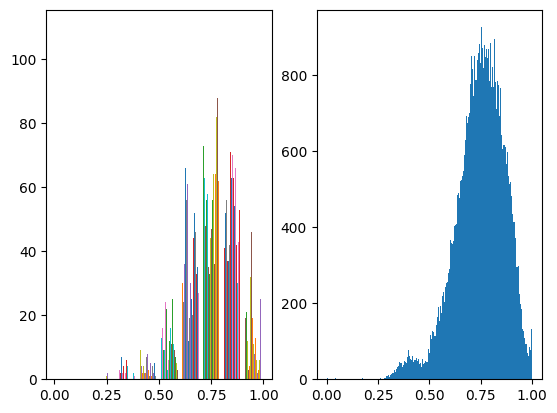

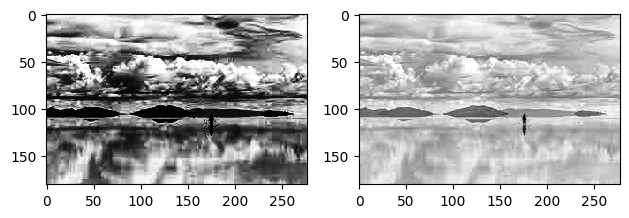

In [ ]:

# https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_random_walker_segmentation.html
from skimage import io,exposure
import numpy as np

path = "/content/low_contrast.jpeg"
img = io.imread(path, as_gray=True)
img = nd.median_filter  (img, size=3)

eq1_img = exposure.equalize_hist(img)  # more agresive contrast
eq2_img = exposure.equalize_adapthist(img)

plt.subplot(1,2,1); plt.hist(eq2_img) # .flat bins=10, range=(0,255)
plt.subplot(1,2,2); plt.hist(eq2_img.flat, bins=200); plt.show()
plt.subplot(1,2,1); io.imshow(eq1_img) # .flat bins=10, range=(0,255)
plt.subplot(1,2,2); io.imshow(eq2_img); plt.show()

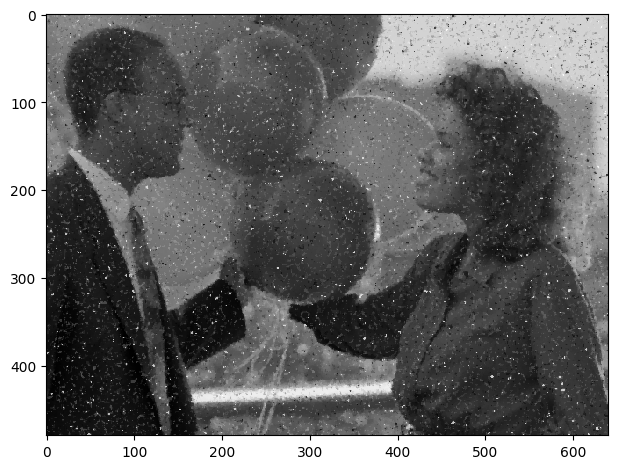

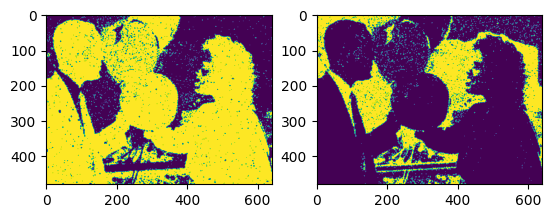

In [ ]:
# RANDOM WALKER SEGMENTATION
from skimage.segmentation import random_walker
from skimage import io
import numpy as np
from scipy import ndimage as nd

#path = "/content/balloons_noisy.png"
#img = io.imread(path, as_gray=True)
#img = nd.median_filter  (img, size=3)

markers = np.zeros(img.shape, dtype=np.uint) # image size matrix zeros
markers [ ( 0.2 < img) & (img < 0.4) ] = 1 # fill 1 to pix condition
markers [ ( 0.4 < img) & (img < 0.7) ] = 2
markers [ ( 0.7 < img) & (img < 1.0) ] = 3

labels = random_walker(img, markers, beta=1, mode='bf') 

segment1 = (labels==1)
segment2 = (labels==2)
segment3 = (labels==3)

io.imshow(img); io.show()
plt.subplot(1,2,1); plt.imshow(segment1)
plt.subplot(1,2,2); plt.imshow(segment2); plt.show()


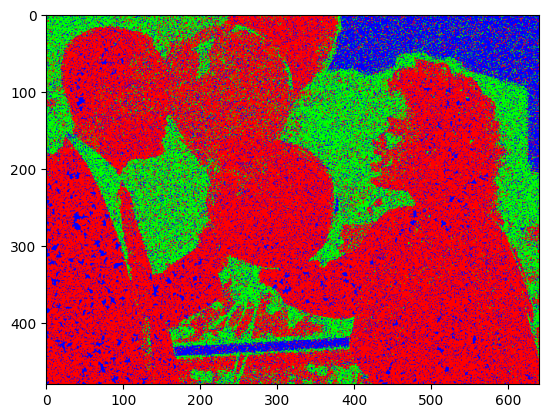

In [ ]:
all_segments = np.zeros((img.shape[0],img.shape[1], 3))
all_segments[segment1] = (1,0,0) # RED
all_segments[segment2] = (0,1,0) # GREEN
all_segments[segment3] = (0,0,1) # BLUE

plt.imshow(all_segments); plt.show()

# **25 OPEN CV**

(480, 640, 3)
[181 165 152]
[ 45  49 111]


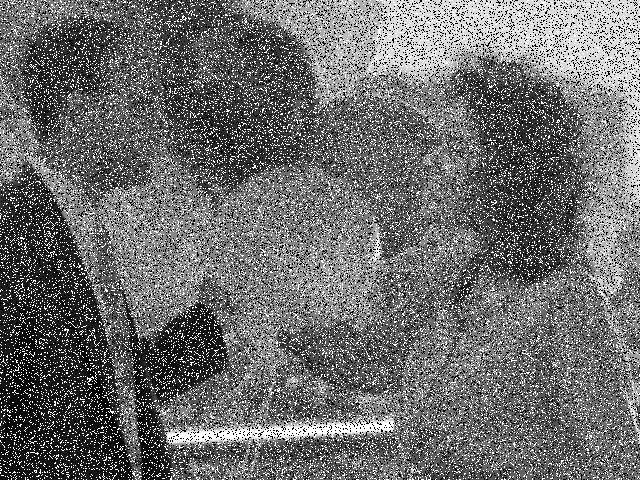

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
path = "/content/balloons_noisy.png"

img = cv2.imread(path,1) # 0 gray  1 color 2 alpha

print(img.shape)  # (480, 640, 3)
print(img[000,000]) #top left  pixel (FIRST PIX)
print(img[479,639]) #bot right pixel (LAST  PIX)

# MANUAL CHANNEL SPLIT      BGR instead of RGB
blue  = img [:,:,0]
green = img [:,:,1]
red   = img [:,:,2]

# CHANNEL SPLIT FUNCTION
b,g,r = cv2.split(img)
img   = merged( (b,g,r)  )

cv2_imshow(red) # cv2.waitKey()


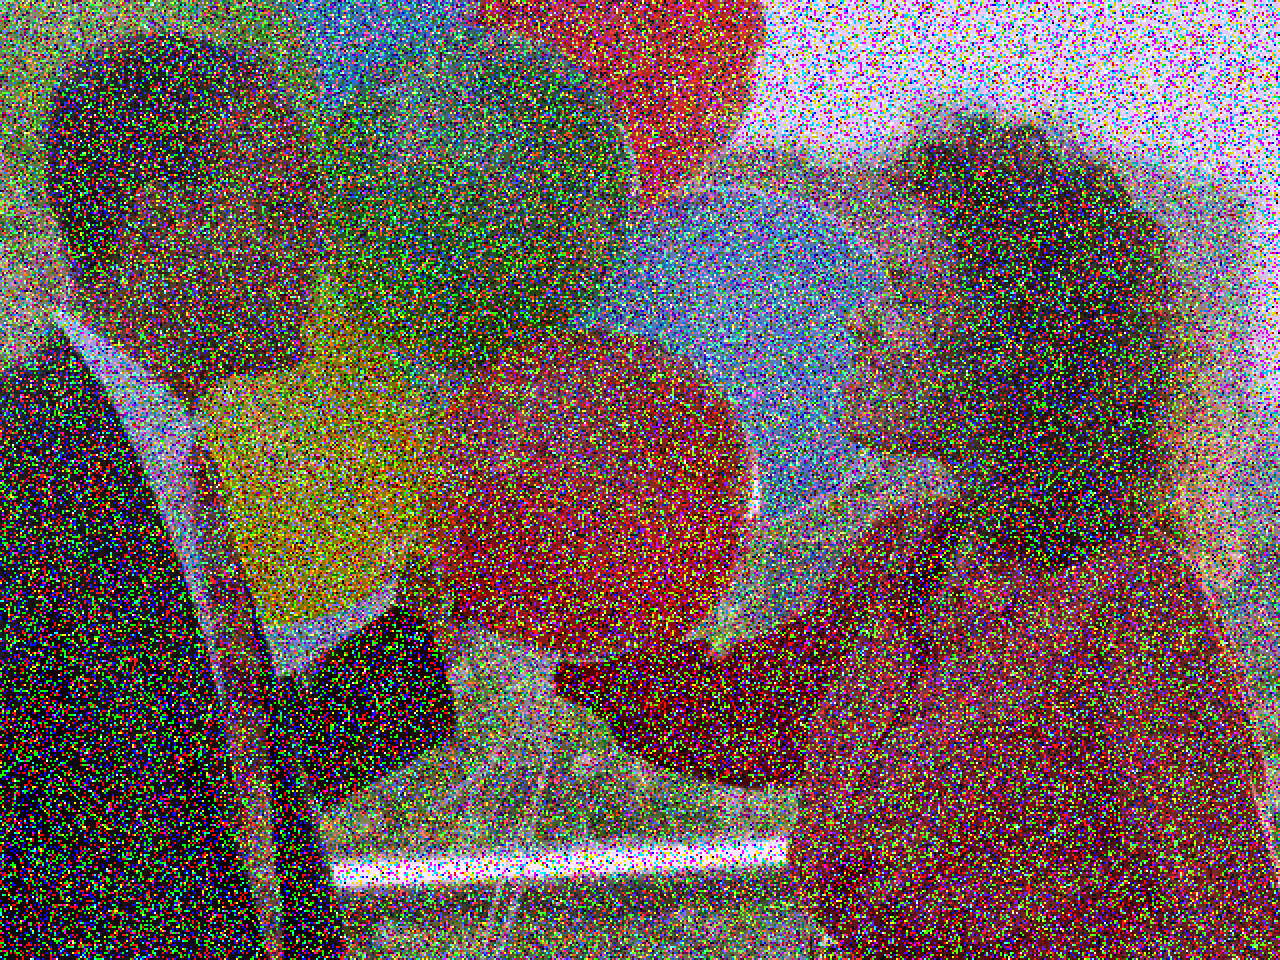

In [ ]:
resized =  cv2.resize(img, None, fx=2, fy=2, interpolation = cv2.INTER_AREA) # fx = horizontal_factor
cv2_imshow(resized) # cv2.waitKey()

# **26 CV2 DENOISE & EDGE DETECTION**

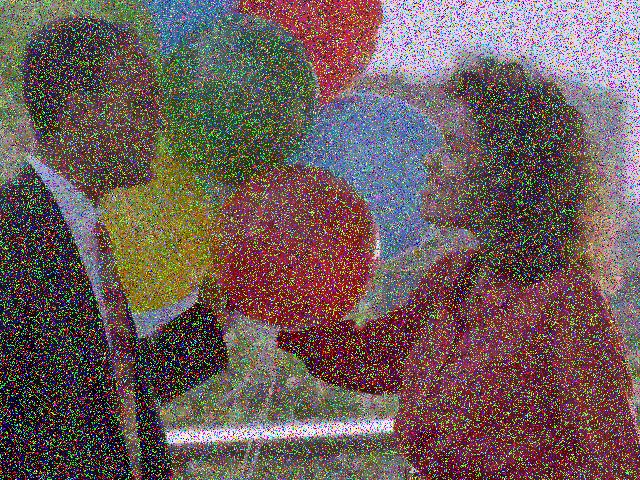

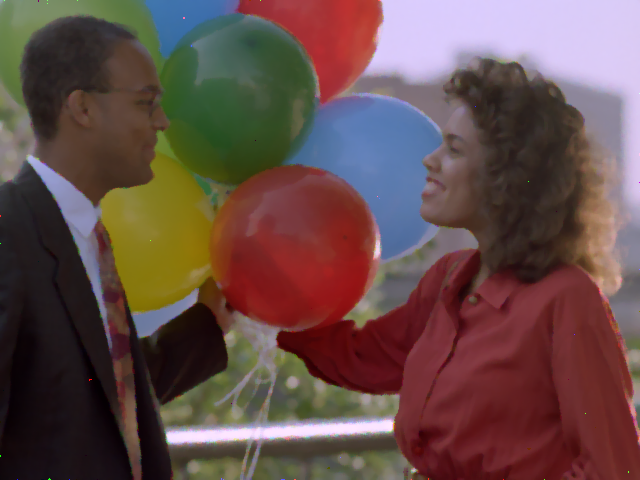

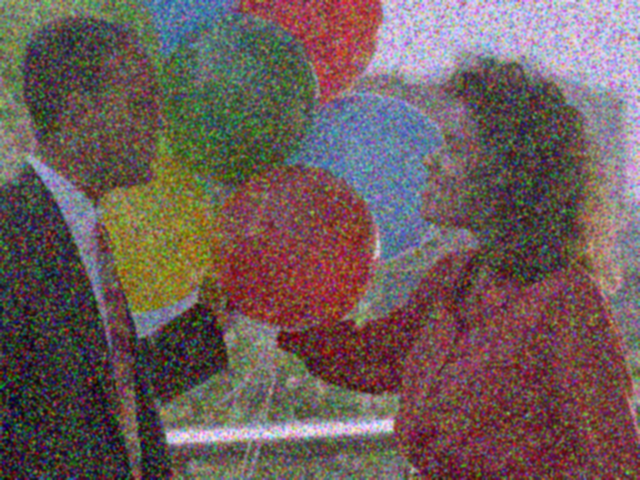

In [ ]:
import cv2   # https://docs.opencv.org/4.x/d2/d96/tutorial_py_table_of_contents_imgproc.html
import numpy as np
from google.colab.patches import cv2_imshow
path = "/content/balloons_noisy.png"
img  = cv2.imread(path); n=6
kernel = np.ones((n,n), np.float32)/(n**2)
# CONVOLUTION 
filt_2D     = cv2.filter2D(img,-1,kernel )
blur        = cv2.blur(img,(n,n))           # same result
gauss_blur  = cv2.GaussianBlur(img,(5,5),0) # https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html
median      = cv2.medianBlur(img,5)
bilateral   = cv2.bilateralFilter(img,9,75,75)

cv2_imshow(bilateral) # cv2.waitKey()
cv2_imshow(median) # cv2.waitKey()
cv2_imshow(gauss_blur) # cv2.waitKey()


# **27 HISTOGRAM EQ & TRESHOLDING**

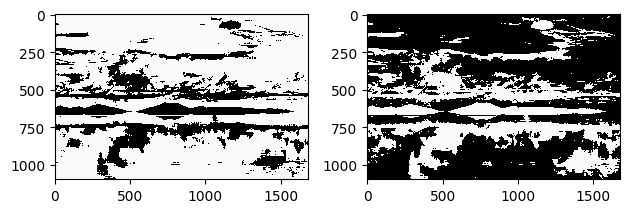

In [ ]:
#https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_tutorials.html
# https://riscadoa.com/other/opencv-gsoc-2/       
# https://shimat.github.io/opencvsharp_docs       https://docs.opencv.org/4.x/
import cv2
from skimage import io
import numpy as np
from matplotlib import pyplot as plt

path = "/content/low_contrast.jpg"
img = cv2.imread(path,0)

clahe = cv2.createCLAHE( clipLimit = 5.0 , tileGridSize = (8,8) )
eq_img = cv2.equalizeHist(img) # https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html


ret, thresh1 =  cv2.threshold(img, 200, 250,  cv2.THRESH_BINARY)      # pix > 200
ret, thresh2 =  cv2.threshold(img, 200, 250,  cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)  # pix < 200


# plt.hist(eq_img.flat, bins=100 , range=(0,1) ); plt.show()
#cv2.imshow(thresh1) # cv2.waitKey() #cv2.destroyAllWindows()

plt.subplot(1,2,1); io.imshow(thresh1) # .flat bins=10, range=(0,255)
plt.subplot(1,2,2); io.imshow(thresh2); plt.show()


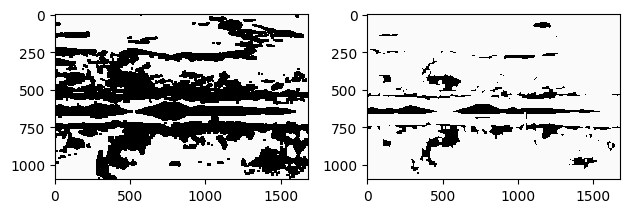

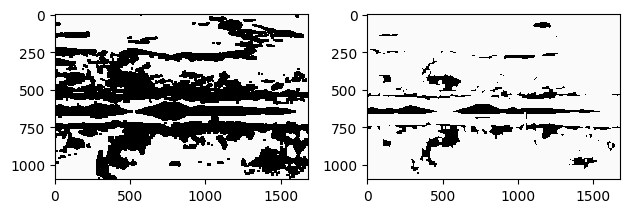

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html
kernel1     = np.ones((15,15),np.uint8 )
_,_,kernel2 = Posit_kernel(7)  
kernel2 = 7.5-kernel2


erosion1  = cv2.erode(  thresh1, kernel1 , iterations=1) 
erosion2  = cv2.erode(  thresh1, kernel2 , iterations=1) 
dilation1 = cv2.dilate( thresh1, kernel1 , iterations=1 )
dilation2 = cv2.dilate( thresh1, kernel2 , iterations=1 )


plt.subplot(1,2,1); io.imshow(erosion1) # .flat bins=10, range=(0,255)
plt.subplot(1,2,2); io.imshow(dilation1); plt.show()
print(" ")
plt.subplot(1,2,1); io.imshow(erosion2) # .flat bins=10, range=(0,255)
plt.subplot(1,2,2); io.imshow(dilation2); plt.show()

# **29 - KEY POINTS DETECTORS**

HARRIS
https://theailearner.com/tag/cv2-cornerharris/  

https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html

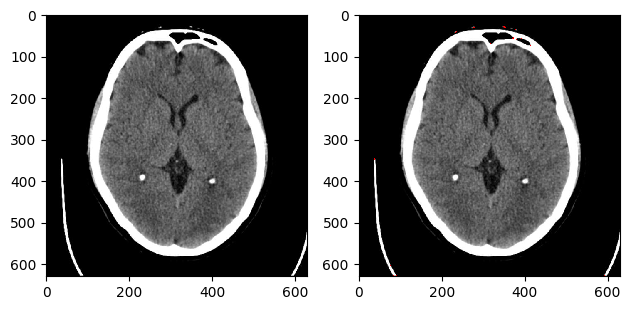

In [26]:
# https://sooeet.com/math/online-fft-calculator.php
# https://scistatcalc.blogspot.com/2013/12/fft-calculator.html#
#
# https://theailearner.com/tag/cv2-cornerharris/
# https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html

import cv2
from skimage import io
import numpy as np
from matplotlib import pyplot as plt

path = "/content/CT_brain.jpg"
img = cv2.imread(path)
plt.subplot(1,2,1); io.imshow(img);


gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

harris = cv2.cornerHarris(gray,2,3, 0.04) #img,neibour_zise, sobel_aperture
img[harris>0.01*harris.max()] = [255,0,0]

plt.subplot(1,2,2); io.imshow(img); 
plt.show()

[SHI TOMASSI](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_shi_tomasi/py_shi_tomasi.html)

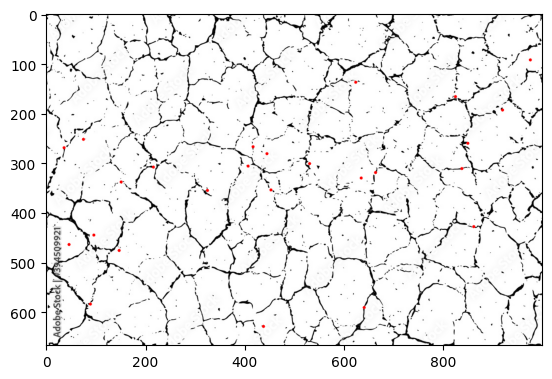

(<matplotlib.image.AxesImage at 0x7fa2315f6170>, None)

In [29]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
path = "/content/cracks.jpg"
img = cv2.imread(path)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel() # print(x,y) # corners detected
    cv2.circle(img,(x,y),3,255,-1)

plt.imshow(img),plt.show()

## KEY POINT DESCRIPTORS
SCALE INVARIANT FEATURE TRANSFORM (SIFT)  
https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html

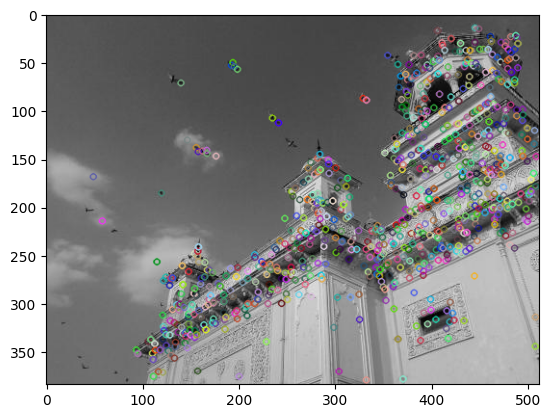

(<matplotlib.image.AxesImage at 0x7ff58094e110>, None)

In [9]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
path = "/content/Palace.jpg"
img = cv.imread(path)
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img = cv.drawKeypoints(gray,kp,img)
cv.imwrite('sift_keypoints.jpg',img)

plt.imshow(img),plt.show()

## FAST Algorithm for Corner  
Detectionhttps://docs.opencv.org/3.4/df/d0c/tutorial_py_fast.html

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 5083
Total Keypoints without nonmaxSuppression: 17733


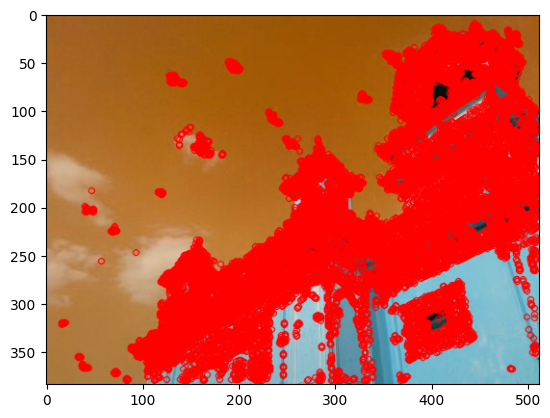

(<matplotlib.image.AxesImage at 0x7fee6452d3c0>, None)

In [6]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#path = "/content/Palace.jpg"
path = "/home/ariel/Desktop/img/Palace.jpg"
#img = cv.imread(path, cv.IMREAD_GRAYSCALE)
img = cv.imread(path)
# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
cv.imwrite('fast_true.png', img2)
# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
cv.imwrite('fast_false.png', img3)

plt.imshow(img3),plt.show()

## ORB (Oriented FAST and Rotated BRIEF)  
https://docs.opencv.org/3.4/d1/d89/tutorial_py_orb.html

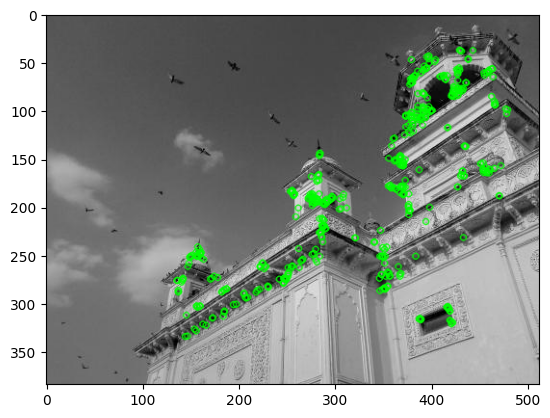

(<matplotlib.image.AxesImage at 0x7fee71322d70>, None)

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

path = "/content/Palace.jpg"
path = "/home/ariel/Desktop/img/Palace.jpg"
img = cv.imread(path, cv.IMREAD_GRAYSCALE)


# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()